# 1. Problem statement :
            
Problem-Type : Multi-Class Image Classification
        
Given a fashion realted images and our goal is to classify them into their actual corresponding label.
This problem can be useful in Ecommerce website/any other shooping websites or search engines as a feature of finding the type of items the customers looking for.

In This case, problem is limited to only 10 labels they are
            	T-shirt/top,
           	Trouser,
             	Pullover,
             	Dress,
             	Coat,
             	Sandal,
             	Shirt,
             	Sneaker,
             	Bag,
             	Ankle boot.

# 2. Data and information
The Dataset used in training was downloaded from tensorflow and the name of the dataset is FASHION_MNIST dataset which provides
both training and test sets containing 60000 instances.

The size of the pixels provided in both train and test sets are (28 X 28 pixels) of greyscale images which is of only single channel and a label that can have a number ranging between (0-9) i.e., 10 multi-class labels
and the numbers corresponding to the image has their own names listed below
            
            0   T-shirt/top
            1 	Trouser
            2 	Pullover
            3 	Dress
            4 	Coat
            5 	Sandal
            6 	Shirt
            7 	Sneaker
            8 	Bag
            9 	Ankle boot


## 2.1.1 Importing essential Libariers

In [121]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D,MaxPool2D,GlobalMaxPool1D,Input,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score

from tensorflow.keras.utils import to_categorical

# 2.1.2 Loading Data

In [201]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 2.2 Sample Image and its description

AxesImage(80,52.8;496x369.6)
Label = 0
Pixel size = (28, 28)


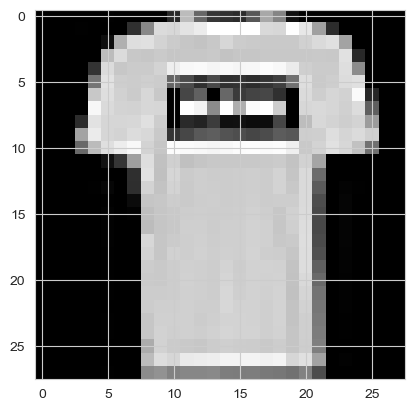

In [202]:
print(plt.imshow(x_train[1],cmap=plt.get_cmap('gray')))
print(f"Label = {y_train[1]}")
print(f"Pixel size = {x_train.shape[1:]}")

# 3. Preprocessing data

The image pixels values ranging between(0-255) Neural Nets are sensitive to the numbers,so normalizing the pixel values  between(0-1) can make training faster and smoother also reshaping them into single channel for training purpose.

Label column has numbers ranging between(0-9), transforming them into one-hot representation for better classification problem

In [203]:
# for image pixels
def preprocess(data):
    data = data.astype('float32')
    data = data/255.0
    data = data.reshape((data.shape[0],28,28,1))
    return data

# for labels
def process_label(data):
    data = to_categorical(data)
    return data

In [204]:
x_train = preprocess(x_train)
x_test = preprocess(x_test)

y_train = process_label(y_train)

In [205]:
print(f"training sample shape is {x_train[0].shape} and label sample shape is {y_train[0].shape}")

training sample shape is (28, 28, 1) and label sample shape is (10,)


# 3.1.1 Sample image values

In [228]:
x_train[0][3:4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.05098039],
        [0.28627452],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.01568628],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.00392157],
        [0.        ]]], dtype=float32)

# 3.1.2 Sample label

In [120]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 4. Defining CNN Model

In [111]:
model = Sequential([
    Input(shape=(28,28,1)), 
    Conv2D(64,(10,10),activation='relu'),
    MaxPool2D(64,(2,2),padding='same'),
    Conv2D(128,(6,6),activation='relu'),
    MaxPool2D(64,(2,2),padding='same'),
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D(64,(2,2),padding='same'),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax') # returns probablities for each label
])

In [112]:
model.compile(Adam(1e-4),CategoricalCrossentropy(),['accuracy'])

In [122]:
# For tracking model and autostopping when loss is not decreasing
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=2,
    restore_best_weights=True,
)

# 5. Training Model

In [115]:
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),callbacks=[tensorboard_callback,early_stopping])

Epoch 1/30
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4598 - accuracy: 0.4650 - val_loss: 1.0990 - val_accuracy: 0.6007
Epoch 2/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.9699 - accuracy: 0.6408 - val_loss: 0.9405 - val_accuracy: 0.6476
Epoch 3/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.8511 - accuracy: 0.6767 - val_loss: 0.8239 - val_accuracy: 0.6906
Epoch 4/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7809 - accuracy: 0.7022 - val_loss: 0.7574 - val_accuracy: 0.7167
Epoch 5/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7366 - accuracy: 0.7182 - val_loss: 0.7256 - val_accuracy: 0.7198
Epoch 6/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7080 - accuracy: 0.7291 - val_loss: 0.6976 - val_accuracy: 0.7320
Epoch 7/30
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6836 - accuracy: 0.7413 - val_loss: 0.6823 -

# 6. Training results

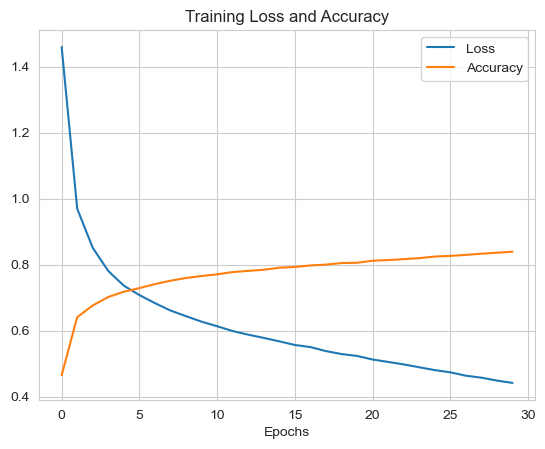

In [164]:
import seaborn as sns

sns.set_style('whitegrid')

loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


fig = plt.gcf()
fig.set_dpi(100)


plt.plot(loss,label='Loss')
plt.plot(accuracy,label='Accuracy')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epochs')
plt.legend()

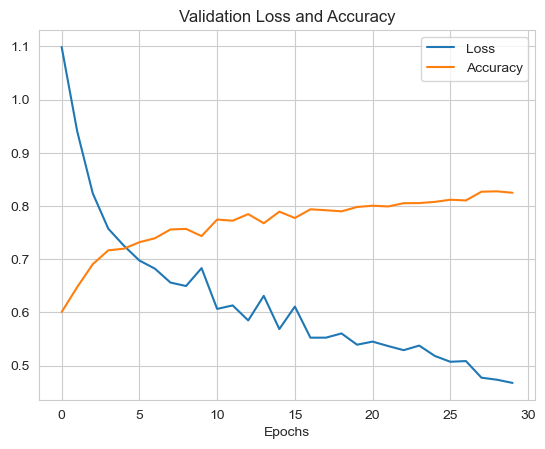

In [162]:
fig = plt.gcf()
fig.set_dpi(100)


plt.plot(val_loss,label='Loss')
plt.plot(val_accuracy,label='Accuracy')
plt.title('Validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.legend()

# 7. Testing the Model

In [168]:
# gives the probablity value of each label being true
y_predicted = model.predict(x_test)

y_predicted[0]

313/313 [==============================] - 2s 7ms/step


array([6.6968325e-10, 1.2622734e-14, 1.3963569e-10, 8.6313499e-08,
       1.4056071e-11, 6.5430785e-03, 8.1915114e-10, 3.3385486e-03,
       1.2112969e-05, 9.9010617e-01], dtype=float32)

In [172]:
# we can use argmax to get the highest probablity value among all the 10 labels for each sample
y_predicted = np.argmax(y_predicted,axis=1)

# 8. Evaluating Testing Results

In [180]:
# true labels of x_test
print(f"True Labels of x_test if {y_test}")
print(f"predicted Labels of x_test if {y_predicted}")

True Labels of x_test if [9 2 1 ... 8 1 5]
predicted Labels of x_test if [9 2 1 ... 8 1 7]


In [210]:
print(f"CONFUSION MATRIX \n\n{confusion_matrix(y_test,y_predicted)}\n")
accuracy_test = accuracy_score(y_test,y_predicted)
print(f"Accuracy score for TEST-SET is {accuracy_test}")

CONFUSION MATRIX 

[[820   0   9  68   7   2  81   0  13   0]
 [  0 953   4  38   0   0   5   0   0   0]
 [ 16   2 784  14  91   0  88   0   5   0]
 [ 41  13  12 885  16   1  29   0   2   1]
 [  3   3 193  61 599   0 135   0   6   0]
 [  0   0   0   1   0 939   0  35   2  23]
 [271   4 113  49  81   0 468   0  14   0]
 [  0   0   0   0   0  15   0 904   0  81]
 [  7   0   1   6   8  14  25   6 933   0]
 [  1   0   0   1   0  12   0  22   0 964]]

Accuracy score for TEST-SET is 0.8249


# Conclusion:


In [225]:
tr_loss = loss[-1]
tr_accuracy = accuracy[-1]

test_accuracy = accuracy_test
test_loss = val_loss[-1]

results = pd.DataFrame()
results['Training-set'] = [tr_loss,tr_accuracy]
results['Test-Set'] = [test_loss,test_accuracy]
results['RESULTS'] = ['LOSS','ACCURACY']
results.set_index('RESULTS')

,Training-set,Test-Set
RESULTS,,
LOSS,0.441873,0.467561
ACCURACY,0.839483,0.824900


In [ ]:
# END #